In [257]:
from recons import antenna_set, coincidence_set, PWF_loss
import numpy as np
import matplotlib.pyplot as plt

In [271]:
an = antenna_set('/Users/mguelfan/Documents/GRAND/ADF_DC2/output_recons_ADF/coord_antennas.txt')
co = coincidence_set('/Users/mguelfan/Documents/GRAND/ADF_DC2/output_recons_ADF/Rec_coinctable.txt', an)


 Reading antenna positions from file /Users/mguelfan/Documents/GRAND/ADF_DC2/output_recons_ADF/coord_antennas.txt
 Reading coincidence(s): index, peak time, peak amplitude from file /Users/mguelfan/Documents/GRAND/ADF_DC2/output_recons_ADF/Rec_coinctable.txt


In [272]:
an.coordinates

array([[  -0.        ,   -9.67000008, 1086.        ],
       [   8.72000027,   -6.8499999 , 1086.        ],
       [  12.32999992,   -0.        , 1086.        ],
       [   8.72000027,    6.8499999 , 1086.        ],
       [   0.        ,    9.67000008, 1086.        ],
       [  -8.68999958,    6.82000017, 1086.        ],
       [ -12.27999973,    0.        , 1086.        ],
       [  -8.68999958,   -6.82000017, 1086.        ],
       [  -0.        ,  -21.87000084, 1086.        ],
       [  19.76000023,  -15.52000046, 1086.        ],
       [  27.97999954,   -0.        , 1086.        ],
       [  19.76000023,   15.52000046, 1086.        ],
       [   0.        ,   21.87000084, 1086.        ],
       [ -19.61000061,   15.39999962, 1086.        ],
       [ -27.69000053,    0.        , 1086.        ],
       [ -19.61000061,  -15.39999962, 1086.        ],
       [  -0.        ,  -31.60000038, 1086.        ],
       [  28.60000038,  -22.46999931, 1086.        ],
       [  40.54000092,   -0.

In [273]:
current_recons = 0
args=(co.antenna_coords_array[current_recons,:],co.peak_time_array[current_recons,:])
 

In [274]:
angles = np.deg2rad(np.array([112.2, 270]))
PWF_loss(angles, *args)

465138775.9523581

In [275]:
from scipy.optimize import minimize
res = minimize(PWF_loss, angles, args = args, method = 'BFGS')

In [276]:
np.rad2deg(res.x)
PWF_loss(res.x, *args)


22986.163200066367

In [277]:
from simulation import Simulations
s = Simulations('/Users/mguelfan/Documents/GRAND/ADF_DC2/output_recons_ADF/coord_antennas.txt')
s(angles, sigma_t=5e-9)


 Reading antenna positions from file /Users/mguelfan/Documents/GRAND/ADF_DC2/output_recons_ADF/coord_antennas.txt


In [278]:
co2 = coincidence_set('Rec_coinctable_simulated.txt', an)
args2 =((co2.antenna_coords_array[current_recons,:],co2.peak_time_array[current_recons,:]))
PWF_loss(angles, *args2)

 Reading coincidence(s): index, peak time, peak amplitude from file Rec_coinctable_simulated.txt


64684.99290422533

In [279]:
def logprob(angles, coords, times):
    return -0.5*PWF_loss(angles, coords, times)

In [280]:
#logprob(co2.peak_time_array[current_recons,:], angles)

In [281]:
current_recons = 0
ndim, nwalkers = 2, 10 #2dim car 2 angles theta et phi
args = (co.antenna_coords_array[current_recons,:], co.peak_time_array[current_recons,:])
from emcee import EnsembleSampler
sampler = EnsembleSampler(nwalkers, ndim, logprob, args=args)
thetas = np.random.rand(10)*np.pi/2 + np.pi/2
phis = np.random.rand(10)*2.*np.pi
p0 = np.vstack((thetas, phis)).T


In [282]:
state  = sampler.run_mcmc(p0, 100)
sampler.reset()
sampler.run_mcmc(state, 10000)

State([[2.47337026e+00 1.98381250e-03]
 [3.89406496e+00 1.57042687e+01]
 [2.47349836e+00 6.28511879e+00]
 [3.81345509e+00 9.42351093e+00]
 [2.47330414e+00 1.97127507e-03]
 [2.47352218e+00 6.28529587e+00]
 [2.47344520e+00 6.28518045e+00]
 [2.47333143e+00 1.88668840e-03]
 [3.81350150e+00 9.42367568e+00]
 [2.47358109e+00 6.28517034e+00]], log_prob=[ -11493.50879479 -491636.27445848  -11493.36830361  -12657.738285
  -11494.52299995  -11493.73398976  -11493.0829208   -11494.29184674
  -12656.48178713  -11494.28111867], blobs=None, random_state=('MT19937', array([ 903976639, 3918408344,  159129790,  259329073, 1355903392,
       2149020885,  945605628,  161282373, 3592830224, 3687161473,
       3373087030, 1637063499, 1124341947,  403883351, 2979718282,
        311497874, 3099779329, 2685080607, 2250760898, 2593454583,
        797011580, 1592130219, 3280515369, 3186484188, 2812819661,
        390865857,    5459004, 3136259286, 2335628455, 3658058324,
       1580227552, 2905762894, 2741981344

peak value in degree: theta = 141.719415, phi = 0.115373
[1.41719415e+02 1.15372825e-01]


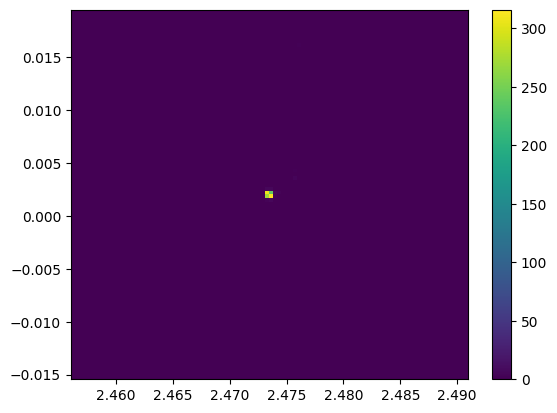

In [283]:

import math
samples = sampler.get_chain(flat=True, thin=25)
logprobs = sampler.get_log_prob(flat=True, thin=25)
mask= (samples[:,0]>np.pi/2)*(samples[:,0]<np.pi)*(samples[:,1]>0)*(samples[:,1]<2*np.pi)
med = np.median(samples[mask,:], axis=0)
onedeg = np.deg2rad(1)
plt.hist2d((samples[mask,0]), (samples[mask,1]), bins=100, range = [[med[0]-onedeg, med[0]+onedeg], [med[1]-onedeg, med[1] +onedeg]])
#plt.hist2d(p0[:,0], p0[:,1]) #points de départ
plt.colorbar()
print('peak value in degree: theta = %f, phi = %f'%tuple(np.rad2deg(med)))
print(np.rad2deg(med))
file_path = '/Users/mguelfan/Documents/GRAND/ADF_DC2/output_recons_ADF/plane_wave_convergence_MCMC.txt'
with open(file_path, 'a') as file:
    if np.rad2deg(med[1]) >= 180:
        phi_degree = round(np.rad2deg(med[1],0))
        file.write(f" {np.rad2deg(med[0]):.1f} {np.rad2deg(med[1]):.1f} {180-np.rad2deg(med[0]):.1f} {phi_degree-180:.1f}\n")
    else :
        phi_degree = np.rad2deg(med[1]) - 180
        phi_degree = round(phi_degree,0)
        phi_radian =  math.radians(phi_degree)
        phi_radian = phi_radian % (2*math.pi)
        phi_degree_final = round(np.rad2deg(phi_radian),-1)
        file.write(f" {np.rad2deg(med[0]):.1f} {np.rad2deg(med[1]):.1f} {180-np.rad2deg(med[0]):.1f} {phi_degree_final:.1f}\n")



In [243]:
import math

# Angle en degrés
angle_degrees = 179

# Conversion en radians
if angle_degrees >= 180:
    result = angle_degrees - 180
else:
    angle_degreesbis = angle_degrees - 180
    angle_radians = math.radians(angle_degreesbis)
    result = angle_radians % (2*math.pi)
    result = np.rad2deg(result)

print("Angle en degrés:", angle_degrees)
print("Angle en radians:", angle_radians)
print("Résultat (angle modulo pi):",result)

Angle en degrés: 179
Angle en radians: -0.017453292519943295
Résultat (angle modulo pi): 359.0


In [228]:
print(225-180)

45
